In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("NFIX.scRNA.csv")

In [4]:
df.head()

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,RNA.weight,ADT.weight,wsnn_res.1,seurat_clusters,Blood_pred,BM_pred,Bone_pred,id,manual_label,wnnUMAP_1,wnnUMAP_2,manual_label2
mWT_AAACCCAAGTGATCGG-1,mWT,3787,1690,103,7,5.307631,0.129730,0.870270,9,9,9,9,9,reference,ST-HSC.2,-4.705750,1.784527,9
mWT_AAACCCACAAACCATC-1,mWT,13420,3991,284,8,3.204173,0.040802,0.959198,3,3,3,Hematopoietic Stem Cell,3,reference,LT-HSC.1,-3.996977,3.502246,3
mWT_AAACCCACACTGTCCT-1,mWT,20299,4446,208,7,1.059165,0.135924,0.864076,0,0,0,"Red Blood Cell (Erythrocyte), Stem Cell",Progenitor Cell,reference,Ery,7.585715,-0.513315,0
mWT_AAACCCACAGCCATTA-1,mWT,11463,3649,180,8,2.852656,0.118308,0.881692,9,9,9,9,9,reference,ST-HSC.2,-4.924106,-0.076983,9
mWT_AAACCCAGTACCTAAC-1,mWT,22463,5146,414,8,3.770645,0.001218,0.998782,5,5,5,Megakaryocyte,5,reference,MKP,0.404801,2.494297,5


In [5]:
df.manual_label

mWT_AAACCCAAGTGATCGG-1        ST-HSC.2
mWT_AAACCCACAAACCATC-1        LT-HSC.1
mWT_AAACCCACACTGTCCT-1             Ery
mWT_AAACCCACAGCCATTA-1        ST-HSC.2
mWT_AAACCCAGTACCTAAC-1             MKP
                                ...   
mNFIXko_TTTGTTGCAAGTGGGT-1         GMP
mNFIXko_TTTGTTGCACGCTATA-1    LT-HSC.1
mNFIXko_TTTGTTGCAGTAACCT-1         ERP
mNFIXko_TTTGTTGCATCGGAGA-1    ST-HSC.2
mNFIXko_TTTGTTGGTACCAATC-1         MEP
Name: manual_label, Length: 13949, dtype: object

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='wnnUMAP_1', ylabel='wnnUMAP_2'>

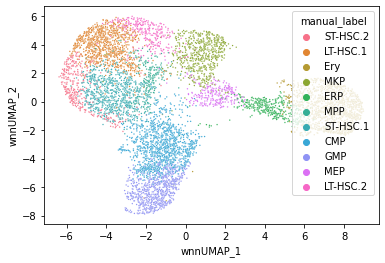

In [14]:
sns.scatterplot(data=df[df['orig.ident']=="mWT"],x="wnnUMAP_1",y="wnnUMAP_2",hue="manual_label",s=2)

<AxesSubplot:xlabel='wnnUMAP_1', ylabel='wnnUMAP_2'>

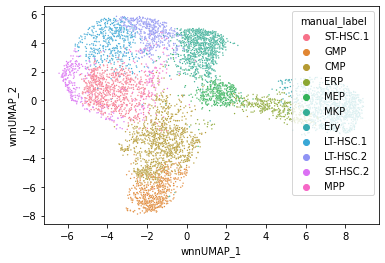

In [13]:
sns.scatterplot(data=df[df['orig.ident']=="mNFIXko"],x="wnnUMAP_1",y="wnnUMAP_2",hue="manual_label",s=2)

In [15]:
from sklearn.metrics import pairwise_distances

In [53]:
cols = ['wnnUMAP_1','wnnUMAP_2']
tmp = df[df.manual_label=="MEP"]
import numpy as np
D = pairwise_distances(tmp[cols],tmp[cols])
np.fill_diagonal(D, np.nan)
D = pd.DataFrame(D)
D.index = tmp.index.tolist()
D.columns = tmp.index.tolist()
D.head()

/home/yli11/.conda/envs/captureC/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/yli11/.conda/envs/captureC/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


,mWT_AAAGGTACAAGCCCAC-1,mWT_AACACACAGGGTCTTT-1,mWT_AACACACTCACTGAAC-1,mWT_AACAGGGGTCACAGAG-1,mWT_AACCACACAACCGATT-1,mWT_AACCACACACGGTGAA-1,mWT_AACCTGACAAAGAGTT-1,mWT_AACCTGACACGACTAT-1,mWT_AACCTGAGTTAAGGAT-1,mWT_AAGAACATCGCACGGT-1,...,mNFIXko_TTGCCTGGTGCATTAC-1,mNFIXko_TTGTTCAAGCGACTGA-1,mNFIXko_TTGTTTGGTATCCTTT-1,mNFIXko_TTTAGTCCAAATCAAG-1,mNFIXko_TTTCACAAGATTGAGT-1,mNFIXko_TTTCAGTAGATTCGCT-1,mNFIXko_TTTCCTCCACACTGGC-1,mNFIXko_TTTGATCCACAACGAG-1,mNFIXko_TTTGATCGTCGGAACA-1,mNFIXko_TTTGTTGGTACCAATC-1
mWT_AAAGGTACAAGCCCAC-1,NaN,2.170108,0.819965,0.308832,1.191019,0.129530,1.365315,0.902670,0.295182,0.525743,...,1.130595,0.948923,0.579623,0.903205,0.788548,0.539900,0.926934,0.657175,0.971373,0.809391
mWT_AACACACAGGGTCTTT-1,2.170108,NaN,1.350865,2.413827,2.061074,2.058997,0.806829,2.068157,2.430659,2.545939,...,1.382571,1.369460,1.812262,1.421652,1.719213,2.168988,2.398061,1.674257,1.416192,1.401397
mWT_AACACACTCACTGAAC-1,0.819965,1.350865,NaN,1.068995,1.149241,0.708388,0.549851,0.984806,1.089597,1.239051,...,0.667419,0.375272,0.604756,0.432238,0.654125,0.938606,1.284745,0.448149,0.460541,0.233002
mWT_AACAGGGGTCACAGAG-1,0.308832,2.413827,1.068995,NaN,1.128864,0.372873,1.618684,0.838681,0.347246,0.606776,...,1.437867,1.114002,0.887612,1.205477,1.096277,0.795684,1.142361,0.794008,1.113497,1.095713
mWT_AACCACACAACCGATT-1,1.191019,2.061074,1.149241,1.128864,NaN,1.092836,1.483693,0.292663,1.432885,1.695406,...,1.811077,0.828063,1.523637,1.559956,1.681024,1.685009,2.090164,0.740641,0.743678,1.358502


0                                                              \
         count      mean       std       min       25%       50%       75%   
1                                                                            
mNFIXko  403.0  0.163746  0.220162  0.051602  0.097788  0.119517  0.142460   
mWT      270.0  0.161826  0.127241  0.060144  0.099057  0.124244  0.174507   

                   
              max  
1                  
mNFIXko  2.915400  
mWT      1.190691

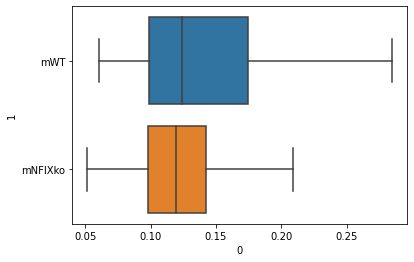

In [78]:
xx = pd.DataFrame(D.quantile(q=0.01))
xx[1] = [x.split("_")[0] for x in xx.index]
xx.columns = [0,1]
xx.head()
# sns.displot(data=xx,x=0,hue=1,kind='kde',cut=0)
sns.boxplot(data=xx,x=0,y=1,showfliers=False)
display(xx.groupby(1).describe())

<AxesSubplot:xlabel='0', ylabel='1'>

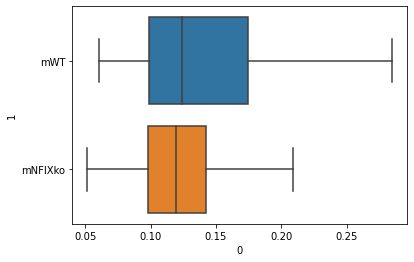

In [80]:
sns.boxplot(data=xx,x=0,y=1,showfliers=False)


0                                                              \
         count      mean       std       min       25%       50%       75%   
1                                                                            
mNFIXko  403.0  0.460188  0.373443  0.246521  0.314717  0.365583  0.438702   
mWT      270.0  0.488407  0.356433  0.261461  0.321370  0.378392  0.490811   

                   
              max  
1                  
mNFIXko  3.208306  
mWT      2.866141

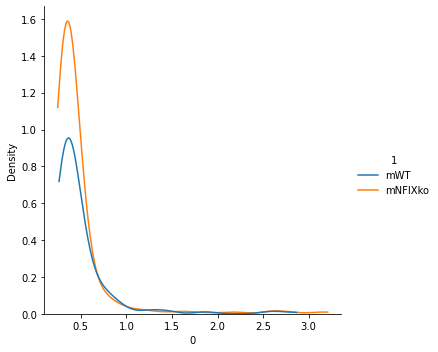

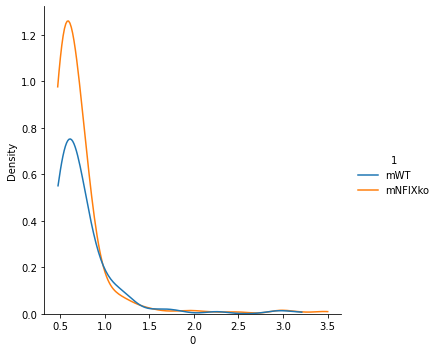

0                                                              \
         count      mean       std       min       25%       50%       75%   
1                                                                            
mNFIXko  403.0  0.716796  0.402305  0.470412  0.512400  0.620007  0.741320   
mWT      270.0  0.762584  0.391310  0.474127  0.539278  0.658700  0.799732   

                   
              max  
1                  
mNFIXko  3.501518  
mWT      3.210324

In [20]:
D.head()

,0,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
0,0.000000,2.170108,8.199652e-01,0.308832,1.191019,0.129530,1.365315,0.902670,0.295182,0.525743,...,1.130595,0.948923,0.579623,0.903205,0.788548,0.539900,0.926934,0.657175,0.971373,0.809391
1,2.170108,0.000000,1.350865e+00,2.413827,2.061074,2.058997,0.806829,2.068157,2.430659,2.545939,...,1.382571,1.369460,1.812262,1.421652,1.719213,2.168988,2.398061,1.674257,1.416192,1.401397
2,0.819965,1.350865,2.980232e-08,1.068995,1.149241,0.708388,0.549851,0.984806,1.089597,1.239051,...,0.667419,0.375272,0.604756,0.432238,0.654125,0.938606,1.284745,0.448149,0.460541,0.233002
3,0.308832,2.413827,1.068995e+00,0.000000,1.128864,0.372873,1.618684,0.838681,0.347246,0.606776,...,1.437867,1.114002,0.887612,1.205477,1.096277,0.795684,1.142361,0.794008,1.113497,1.095713
4,1.191019,2.061074,1.149241e+00,1.128864,0.000000,1.092836,1.483693,0.292663,1.432885,1.695406,...,1.811077,0.828063,1.523637,1.559956,1.681024,1.685009,2.090164,0.740641,0.743678,1.358502


In [23]:
D.head()

,mWT_AAAGGTACAAGCCCAC-1,mWT_AACACACAGGGTCTTT-1,mWT_AACACACTCACTGAAC-1,mWT_AACAGGGGTCACAGAG-1,mWT_AACCACACAACCGATT-1,mWT_AACCACACACGGTGAA-1,mWT_AACCTGACAAAGAGTT-1,mWT_AACCTGACACGACTAT-1,mWT_AACCTGAGTTAAGGAT-1,mWT_AAGAACATCGCACGGT-1,...,mNFIXko_TTGCCTGGTGCATTAC-1,mNFIXko_TTGTTCAAGCGACTGA-1,mNFIXko_TTGTTTGGTATCCTTT-1,mNFIXko_TTTAGTCCAAATCAAG-1,mNFIXko_TTTCACAAGATTGAGT-1,mNFIXko_TTTCAGTAGATTCGCT-1,mNFIXko_TTTCCTCCACACTGGC-1,mNFIXko_TTTGATCCACAACGAG-1,mNFIXko_TTTGATCGTCGGAACA-1,mNFIXko_TTTGTTGGTACCAATC-1
mWT_AAAGGTACAAGCCCAC-1,0.000000,2.170108,8.199652e-01,0.308832,1.191019,0.129530,1.365315,0.902670,0.295182,0.525743,...,1.130595,0.948923,0.579623,0.903205,0.788548,0.539900,0.926934,0.657175,0.971373,0.809391
mWT_AACACACAGGGTCTTT-1,2.170108,0.000000,1.350865e+00,2.413827,2.061074,2.058997,0.806829,2.068157,2.430659,2.545939,...,1.382571,1.369460,1.812262,1.421652,1.719213,2.168988,2.398061,1.674257,1.416192,1.401397
mWT_AACACACTCACTGAAC-1,0.819965,1.350865,2.980232e-08,1.068995,1.149241,0.708388,0.549851,0.984806,1.089597,1.239051,...,0.667419,0.375272,0.604756,0.432238,0.654125,0.938606,1.284745,0.448149,0.460541,0.233002
mWT_AACAGGGGTCACAGAG-1,0.308832,2.413827,1.068995e+00,0.000000,1.128864,0.372873,1.618684,0.838681,0.347246,0.606776,...,1.437867,1.114002,0.887612,1.205477,1.096277,0.795684,1.142361,0.794008,1.113497,1.095713
mWT_AACCACACAACCGATT-1,1.191019,2.061074,1.149241e+00,1.128864,0.000000,1.092836,1.483693,0.292663,1.432885,1.695406,...,1.811077,0.828063,1.523637,1.559956,1.681024,1.685009,2.090164,0.740641,0.743678,1.358502


In [26]:
xx=['mWT_AAAGGTACAAGCCCAC-1','mWT_AACACACAGGGTCTTT-1','mWT_AACACACTCACTGAAC-1']

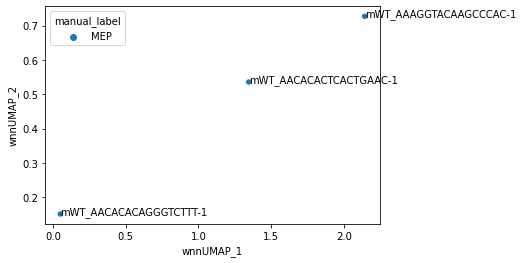

In [34]:
sns.scatterplot(data=tmp.loc[xx],x="wnnUMAP_1",y="wnnUMAP_2",hue="manual_label")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
for idx, row in tmp.loc[xx].iterrows(): 
    plt.text(row['wnnUMAP_1'], row['wnnUMAP_2'], idx)

In [28]:
tmp.loc[xx]

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,RNA.weight,ADT.weight,wsnn_res.1,seurat_clusters,Blood_pred,BM_pred,Bone_pred,id,manual_label,wnnUMAP_1,wnnUMAP_2,manual_label2
mWT_AAAGGTACAAGCCCAC-1,mWT,5177,2101,84,7,3.245123,0.083738,0.916262,8,8,8,Hematopoietic Stem Cell,Red Blood Cell (Erythrocyte),reference,MEP,2.142647,0.727076,8
mWT_AACACACAGGGTCTTT-1,mWT,5493,2179,78,8,3.386128,0.033062,0.966938,8,8,8,Hematopoietic Stem Cell,Red Blood Cell (Erythrocyte),reference,MEP,0.050286,0.151408,8
mWT_AACACACTCACTGAAC-1,mWT,4716,1755,92,8,2.608142,0.548886,0.451114,8,8,8,Hematopoietic Stem Cell,Red Blood Cell (Erythrocyte),reference,MEP,1.345294,0.535840,8
